In [1]:
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import pandas as pd

In [2]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def factor_norm_cmap(df,small_of_paths,factor):
    """ creates colormap based on factor (vector of scalar quantities) in data frame.
    
    df: data frame includes csv file names
    small_of_paths: path to csv files
    factor: string of factor in csv file to compile
    
    returns scalar colormap 
    
    lb 08/2021
    
    """
    vel_vec = np.array([])
    for i in df.file_name:
        temp_df = pd.read_csv(small_of_paths+i)[factor]
        vel_vec = np.concatenate([vel_vec,temp_df])
    
    vel_vec[vel_vec < 0] = 0
    vel_vec_range = np.unique(np.round(vel_vec,2))
    colormap = cm.magma_r
    normalize = mcolors.Normalize(vmin=np.min(vel_vec_range), vmax=np.max(vel_vec_range))
    s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
    
    return s_map,vel_vec

In [7]:
fig_save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'

data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
all_paths_wt = np.load(data_path+'all_paths_wt.npy')
all_paths_tg = np.load(data_path+'all_paths_tg.npy')

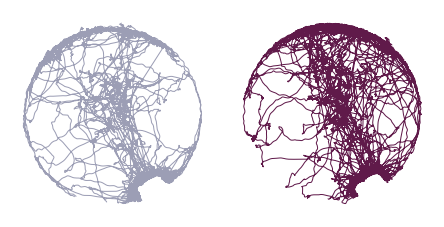

In [8]:
fig, axs = plt.subplots(1,2, figsize=set_size('thesis', fraction=1, subplots=(1, 2)), edgecolor='w')
fig.subplots_adjust(hspace = 0, wspace=-.5)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]  

axs[0].plot(all_paths_wt[:,0],all_paths_wt[:,1],color=flatui[1],alpha=1,linewidth=.5)
axs[1].plot(all_paths_tg[:,0],all_paths_tg[:,1],color=flatui[0],alpha=1,linewidth=.5)

axs[0].axis('off')
axs[1].axis('off')

axs[0].set_aspect('equal','box')
axs[1].set_aspect('equal','box')

plt.savefig(fig_save_path+'paths_d1.svg',dpi=300,bbox_inches='tight')


## Plot paths across days for open field for all animals 

In [9]:
small_of_paths = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/small_of_paths/'

In [11]:
# first create dataframe for ease of identifying mice
path_list = glob.glob(small_of_paths+'*.csv')
df = pd.DataFrame(columns=['file_name','genotype','rat','time_point','day'], index=range(len(path_list)))

for idx, path in enumerate(path_list): 
    temp_name = os.path.splitext(os.path.basename(path))[0].split('_')
    df.loc[idx].file_name = os.path.basename(path)
    df.loc[idx].genotype = temp_name[0]
    df.loc[idx].rat = temp_name[1]
    df.loc[idx].time_point = temp_name[2]
    df.loc[idx].day = temp_name[3]

## Plot paths by velocity across time

In [12]:
vel_cmap,vel_vec = factor_norm_cmap(df,small_of_paths,"velocity")

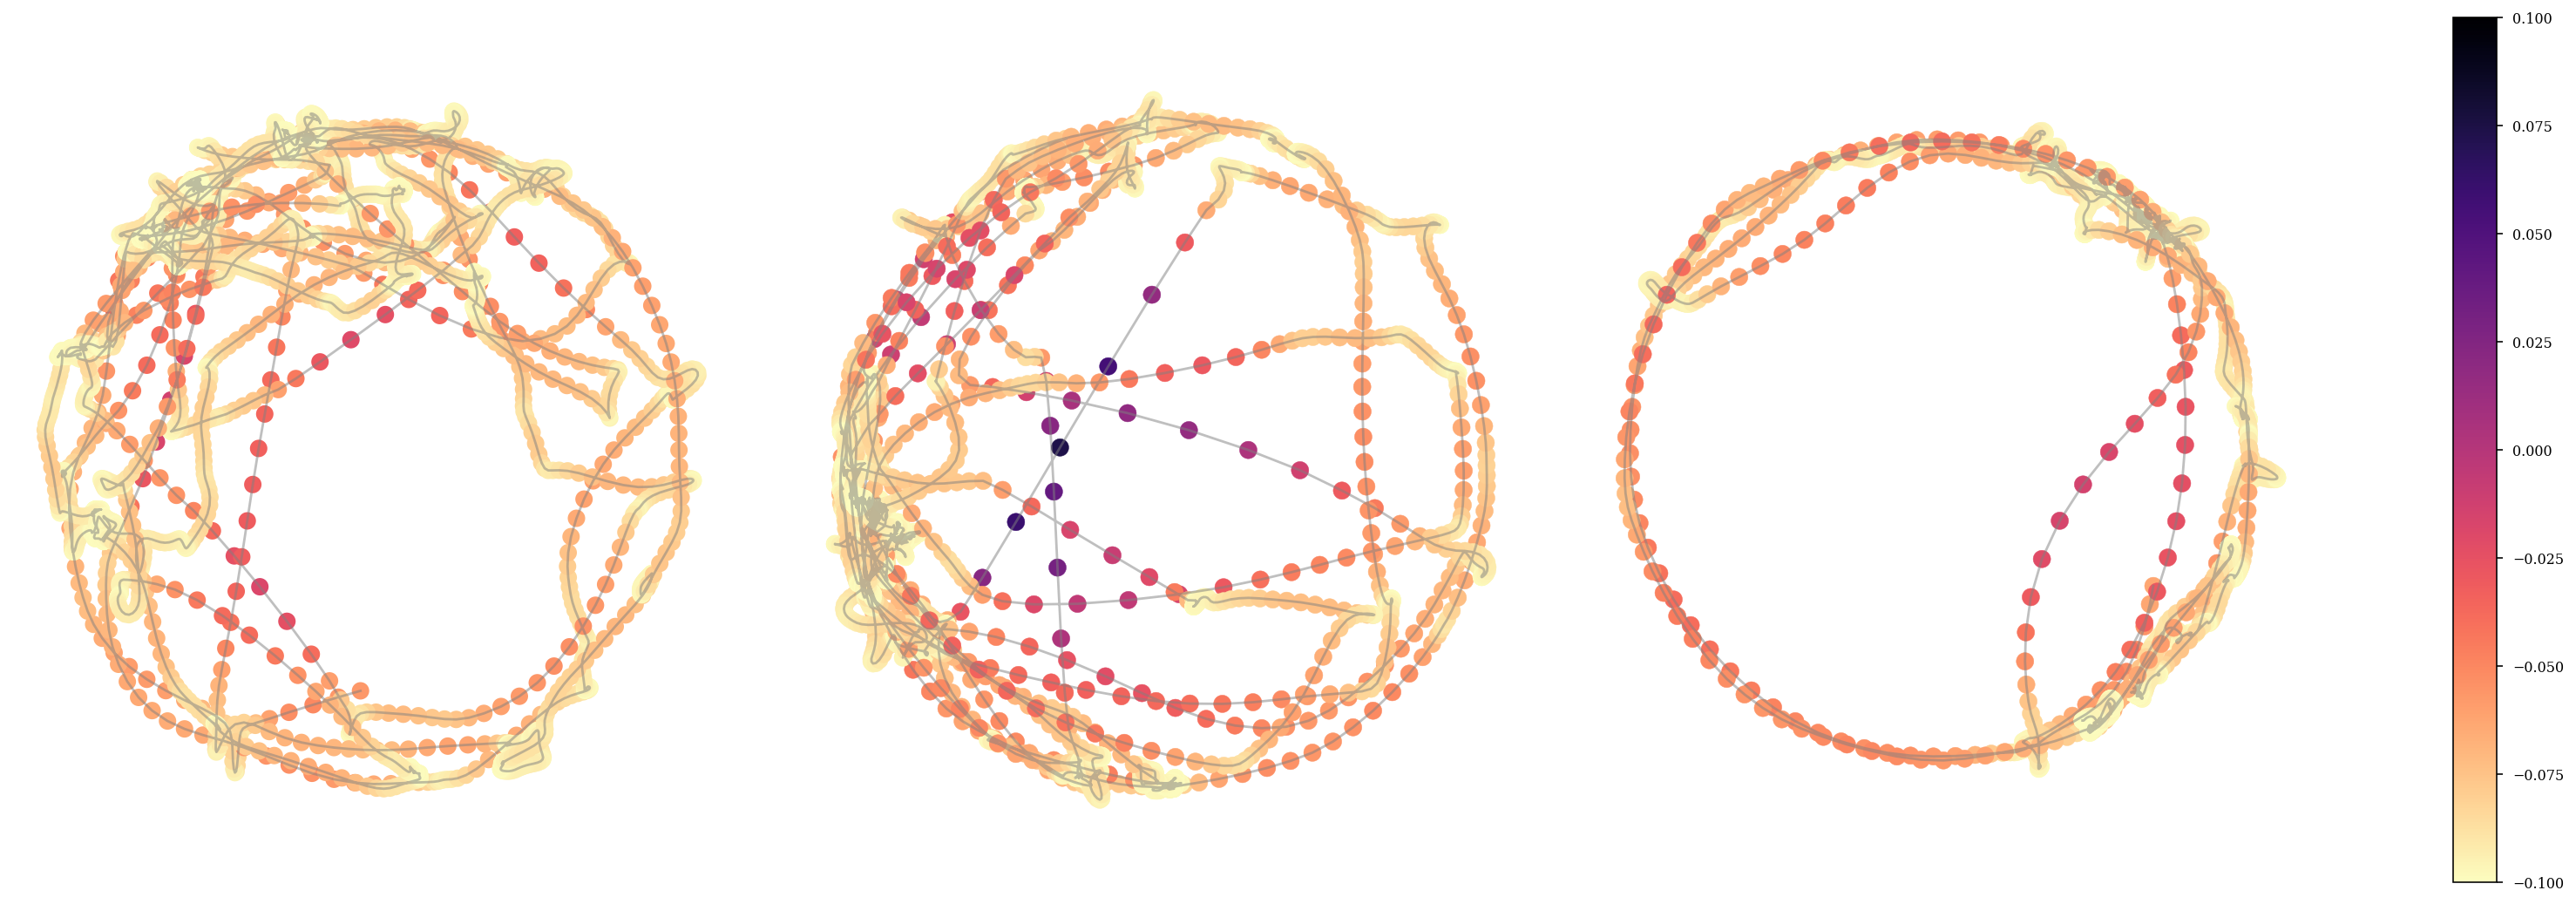

In [13]:
temp_df_1 = pd.read_csv(small_of_paths+df.file_name[0])
temp_df_2 = pd.read_csv(small_of_paths+df.file_name[1])
temp_df_3 = pd.read_csv(small_of_paths+df.file_name[2])

#

fig, axs = plt.subplots(1,3, figsize=set_size('thesis', fraction=5, subplots=(1, 2)), edgecolor='w')
fig.subplots_adjust(hspace = .1, wspace=.1)

axs[0].scatter(temp_df_1.x,temp_df_1.y,c = cm.magma_r(np.round(temp_df_1.velocity,2)/np.nanmax(vel_vec)),edgecolor='none',s = 100 )
axs[0].plot(temp_df_1.x,temp_df_1.y,c='gray',alpha = .5)

axs[1].scatter(temp_df_2.x,temp_df_2.y,c = cm.magma_r(np.round(temp_df_2.velocity,2)/np.nanmax(vel_vec)),s = 100 )
axs[1].plot(temp_df_2.x,temp_df_2.y,c='gray',alpha = .5)

axs[2].scatter(temp_df_3.x,temp_df_3.y,c = cm.magma_r(np.round(temp_df_3.velocity,2)/np.nanmax(vel_vec)),s = 100 )
axs[2].plot(temp_df_3.x,temp_df_3.y,c='gray',alpha = .5)

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_aspect('equal','box')
axs[1].set_aspect('equal','box')
axs[2].set_aspect('equal','box')


fig.colorbar(vel_cmap,ax=axs)
plt.show()

In [136]:
def plot_path_by_vel(df,small_of_paths,time_point = 12):
    """plots paths for each subject in dataframe across days and saves to svg
    
    
    """
    # get subject index
    rats = np.unique(df.rat)
    days = np.unique(df.day)
    
    for rat in rats:
        
        # inialize figure 
        fig, axs = plt.subplots(1,3, figsize=set_size('thesis', fraction=5, subplots=(1, 2)), edgecolor='w')
        fig.subplots_adjust(hspace = .1, wspace=.1)
        
        df.loc[df.rat == rat & df.time_point = time_point]
        for day in days: 
    
    #
    

In [14]:
rats = np.unique(df.rat)
days = np.unique(df.day)

df.loc[(df.rat == rats[1]) & (df.time_point == 12)]


,file_name,genotype,rat,time_point,day


In [154]:
np.sum((df.rat == rats[2]) & (df.time_point == 12))

0

In [15]:
df

,file_name,genotype,rat,time_point,day
0,Tg_113_4_2.csv,Tg,113,4,2
1,Tg_103_4_2.csv,Tg,103,4,2
2,Wt_201_7_2.csv,Wt,201,7,2
3,Wt_211_7_2.csv,Wt,211,7,2
4,Wt_205_12_2.csv,Wt,205,12,2
...,...,...,...,...,...
243,Wt_204_7_2.csv,Wt,204,7,2
244,Tg_109_12_1.csv,Tg,109,12,1
245,Tg_108_12_1.csv,Tg,108,12,1
246,Tg_102_12_2.csv,Tg,102,12,2
